##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [3]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed hence this will not work
#f.write('hello')

In [4]:
# write multiline strings
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

In [5]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('salman khan')
f.close()

In [6]:
# how exactly open() works?

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

where:

file: is the name of the file to be opened. It can be a string that represents the path of the file or an object that has a read() method (e.g. a file-like object).
mode: is the mode in which the file is to be opened. The default value is 'r' which means the file is opened for reading. Other common modes include 'w' for writing, 'a' for appending, 'x' for exclusive creation, and 'b' for binary mode.
buffering: sets the buffering policy. A value of -1 means to use the system default buffering, 0 means to turn off buffering, and any positive integer value sets the buffer size in bytes.
encoding: sets the encoding to be used when reading or writing the file.
errors: sets the error handling scheme. The default value is 'strict' which means to raise an exception on errors, but other options include 'ignore', 'replace', and 'backslashreplace'.
newline: sets the newline character(s) to use when writing text files. The default value is None, which means to use the system default.
closefd: determines whether to close the file descriptor (if one is used) when the file is closed. The default value is True.
opener: is a custom opener function that can be used to open the file. This is an advanced feature and is rarely used.
When you call open() with the appropriate arguments, it returns a file object that you can use to read from or write to the file. You can then use various methods on the file object to read from or write to the file, depending on the mode you specified when opening the file.

In [7]:
# Problem with w mode
# It can't make new text append, for adding new text in an already created file, we have to use 'a' in the argument
# append mode
f = open('/content/sample1.txt','a')
f.write('\n How cool is this!')
f.close()

In [25]:
# write lines
# we can use a list of text and using 'writelines' we can create a text files where all the values of the list will be pushed together one by one.
L = ['hello\n','hi\n','how are you\n','I am fine']
f = open('sample.txt','w')
f.writelines(L)
f.close()

In [9]:
# reading from files
# -> using read()
f = open('sample.txt','r')
s = f.read()
print(s)
f.close()

hello
hi
how are you
I am fine


In [10]:
# reading upto n chars
f = open('sample.txt','r')
s = f.read(10)
print(s)
f.close()

hello
hi
h


In [11]:
# readline() -> to read line by line
f = open('/content/sample.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

hello
hi


In [12]:
# reading entire using readline
f = open('/content/sample.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

hello
hi
how are you
I am fine

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [13]:
# with
with open('sample1.txt','w') as f:
  f.write('selmon bhai')

In [14]:
f.write('hello')

ValueError: ignored

In [15]:
# try f.read() now
with open('/content/sample.txt','r') as f:
  print(f.readline())

hello



In [16]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))

hello
hi
h
ow are you

I am fine



In [17]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [23]:
with open('big.txt','r') as f:

  chunk_size = 12

  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='')
    

hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hell

In [28]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15) 
  # means we change the buffer cursos to point in the (14th index) 15th character of the sample.txt file.
  print(f.tell())
  print(f.read(10)) 
  # now it will start reading from the 16th character (15th index) to next 10 characters.
  print(f.tell())  '
  # It will tell in which character number the buffer cursor is pointing now.
  
  print(f.read(10))
  print(f.tell())

15
e you
I am
25
 fine
30


**seek()** work as a pointer. Suppose if we write f.seek(21), the cursor of the text file will point to the 20th character of that text file. Then if you want to read, the cursor will start reading from 21st.


**tell()** work as like showing the character number in which the buffer cursor pointing at currently.
Suppose you wrote f.seek(12), then you wrote f.read(10). So, now if you write f.tell(), it will answer 22.

In [24]:
# seek during write
with open('sample.txt','w') as f:
  f.write('Hello')
  f.seek(0) 
  #it will make the cursor point at 0th index or 1st character
  f.write('Xa') 

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [ ]:
# working with binary file
with open('screenshot1.png','r') as f:
  f.read()

UnicodeDecodeError: ignored

In [29]:
# working with binary file
with open('18-37337-1.jpg','rb') as f:
  with open('18-37337-1_Copy.jpg','wb') as wf:
    wf.write(f.read())

In [ ]:
# working with a big binary file

In [ ]:
# working with other data types
# We can't write integers in the file system normally.
with open('sample.txt','w') as f:
  f.write(5)

TypeError: ignored

In [ ]:
# We can follow this method like converting integer with string and insert into text file
# then we have retrieve it by another integer conversion.
with open('sample.txt','w') as f:
  f.write('5')

In [ ]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

10


In [30]:
# more complex data
# this time we are trying to write dictionary.
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

In [34]:
with open('sample.txt','r') as f:
  #print(f.read()) # this will print the dictionary but
 # print(type(f.read())) # as string

  #but if we want that as dictionary it won't be possible . 
  #because string can't be converted into dictionary.
  print(dict(f.read()))

ValueError: ignored

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


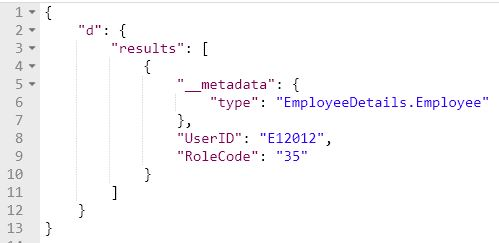

In [ ]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f)


In [ ]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

In [ ]:
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [36]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)


  # It is an important thing to remember, tuples never dumps into json as tuples
  # rather as list.
  # if you load that json file and deserialize it that time you will also get as list
  # so if you want tuple, you have to again use tuple() conversion method.


In [40]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
  json.dump(d,f)



with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(d['marks'])
  print(type(d))

{'student': 'nitish', 'marks': [23, 14, 34, 45, 56]}
[23, 14, 34, 45, 56]
<class 'dict'>


### Serializing and Deserializing custom objects

In [4]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Mahbub Hossain age -> 23 gender -> male

In [5]:
person = Person('Mahbub','Hossain',23,'male')

In [6]:
# As a string
import json

def show_object(person):
  if isinstance(person,Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object)

In [7]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [ ]:
# indent arrtribute
# As a dict

In [8]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Mahbub Hossain', 'age': 23, 'gender': 'male'}
<class 'dict'>


### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [11]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [12]:
p = Person('Faisal',23)


In [13]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)

In [14]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

Hi my name is Faisal and I am  23 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.